In [2]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns 

# 01. 새로운 값 계산하기

In [4]:
df = pd.read_csv('./data/broadcast.csv',index_col = 0)
df


,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


<AxesSubplot: >

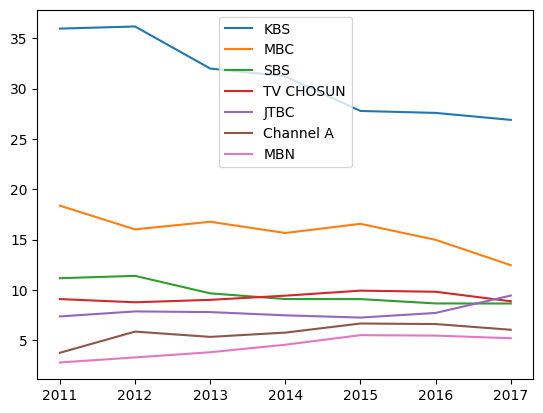

In [6]:
df.plot()

In [7]:
df.sum(axis= 'columns') #모든 칼럼에 있는 값을 더하기 

2011    88.560
2012    89.440
2013    84.451
2014    83.259
2015    82.854
2016    80.891
2017    77.626
dtype: float64

In [8]:
df['Total'] = df.sum(axis='columns')
df #Total이라는 칼럼이 하나 추가됨 

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN,Total
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809,88.560
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310,89.440
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825,84.451
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572,83.259
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520,82.854
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477,80.891
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215,77.626


<AxesSubplot: >

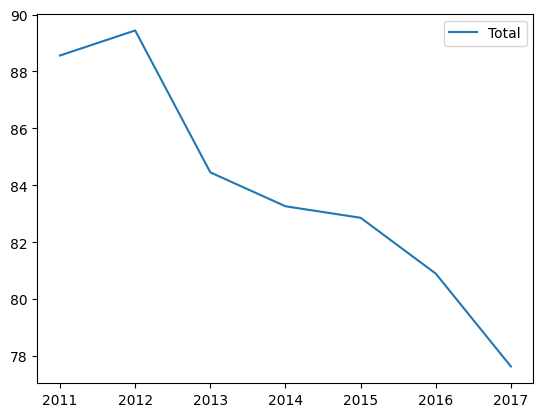

In [9]:
df.plot(y='Total') #시청률이 갈수록 떨어진다. TV를 잘 안보게 됨 

In [11]:
df['Group 1'] = df.loc[:,'KBS':'SBS'].sum(axis='columns') #지상파 (KBS/MBC/SBS의 시청률 합)
df['Group 2'] = df.loc[:,'TV CHOSUN':'MBN'].sum(axis='columns') #종영파 (그외 방송사의 시청률 합)


<AxesSubplot: >

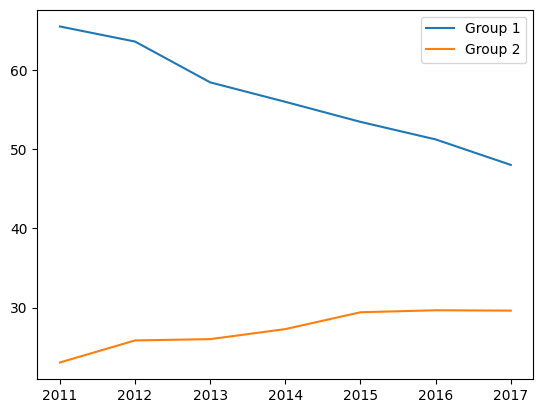

In [12]:
df.plot(y=['Group 1', 'Group 2']) #지상파대신 종영파를 갈수록 보게되는 것을 알 수 있음 

# 02. 문자열 필터링



In [16]:
import pandas as pd

In [20]:
df = pd.read_csv('./data/albums.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Number    500 non-null    int64 
 1   Year      500 non-null    int64 
 2   Album     500 non-null    object
 3   Artist    500 non-null    object
 4   Genre     500 non-null    object
 5   Subgenre  500 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [26]:
#장르를 확인 하는 방법
df['Genre'].unique() 

#Blues 관련된 내용들만 뽑는 방법 
df[df['Genre'].str.contains('Blues')].head(5) #장르에 블루스가 포함된 레이블들 가지고옴 

,Number,Year,Album,Artist,Genre,Subgenre
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
14,15,1967,Are You Experienced,The Jimi Hendrix Experience,"Rock, Blues","Blues Rock, Psychedelic Rock"
18,19,1968,Astral Weeks,Van Morrison,"Jazz, Rock, Blues, Folk, World, & Country","Acoustic, Classic Rock, Free Improvisation"
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
48,49,1971,At Fillmore East,The Allman Brothers Band,"Rock, Blues",Blues Rock


In [27]:
#blues 가 앞에나오는 것만 확인 하는 방법
df[df['Genre'].str.startswith('Blues')]

,Number,Year,Album,Artist,Genre,Subgenre
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
140,141,1965,Live at the Regal,B.B. King,Blues,Chicago Blues
153,154,1958,Moanin' in the Moonlight,Howlin' Wolf,Blues,Chicago Blues
197,198,1967,The Best of Little Walter,Little Walter,Blues,Chicago Blues
237,238,1962,Howlin' Wolf,Howlin' Wolf,Blues,None
277,278,1997,Anthology of American Folk Music,Various,"Blues, Folk, World, & Country","Cajun, Country, Field Recording, Gospel, Delta..."
281,282,1964,Folk Singer,Muddy Waters,Blues,Delta Blues
376,377,1991,The Ultimate Collection: 1948-1990,John Lee Hooker,Blues,"Country Blues, Electric Blues, Chicago Blues, ..."
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [30]:
df['Contains Blues'] = df['Genre'].str.contains('Blues') #블루스가 있는 것을 컬럼 하나 추가해줌
df

,Number,Year,Album,Artist,Genre,Subgenre,Contains Blues
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",False
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",False
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",False
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",False
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,False
...,...,...,...,...,...,...,...
495,496,1969,Boz Scaggs,Boz Scaggs,Rock,Pop Rock,False
496,497,2001,White Blood Cells,The White Stripes,Rock,"Indie Rock, Alternative Rock, Blues Rock, Gara...",False
497,498,1989,The Stone Roses,The Stone Roses,Rock,Indie Rock,False
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues,True


# 03. 박물관이 살아 있다 I

실습 설명
한국에서 잘나가는 동양예술전문가 솔희는 최근 “박물관이 살아 있다” 프로젝트를 시작했습니다.

“박물관이 살아 있다” 프로젝트는 점점 떨어져가는 문화예술공간의 방문율을 높이기 위해 시작되었습니다.
김솔희씨는 먼저 예술의 흥행을 위해선 젊은이들의 참여가 시급하다고 판단하여, 대학교 박물관을 먼저 개선하기로 하였습니다.

대학 박물관을 개선하기 위해 다음과 같이 박물관을 분류하기로 하였습니다.

박물관은 대학/일반 박물관으로 나뉜다.
시설명에 '대학'이 포함되어 있으면 '대학', 그렇지 않으면 '일반'으로 나누어 '분류' column에 입력한다.
'분류' column을 만들어서 솔희를 도와주세요

In [31]:
import pandas as pd

df = pd.read_csv('./data/museum_1.csv')

# 여기에 코드를 작성하세요
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시설명       900 non-null    object
 1   어른관람료     900 non-null    int64 
 2   운영기관전화번호  900 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.2+ KB


In [32]:
df

,시설명,어른관람료,운영기관전화번호
0,필암서원 유물전시관,500,061-390-7224
1,원주역사박물관,0,033-737-4371
2,뮤지엄산미술관,15000,033-730-9000
3,오랜미래신화미술관,0,033-746-5256
4,연세대학교 원주박물관,0,033-760-2731
...,...,...,...
895,함양박물관,0,055-960-5532
896,박물관수,5000,053-744-5500
897,대구은행금융박물관,0,053-740-2061
898,국립대구박물관,0,053-768-6051


In [40]:
df['분류'] = df['시설명'].str.contains('대학')
df.loc[df['분류'] == True, '분류'] = '대학'
df.loc[df['분류'] == False, '분류'] = '일반'

df

,시설명,어른관람료,운영기관전화번호,분류
0,필암서원 유물전시관,500,061-390-7224,일반
1,원주역사박물관,0,033-737-4371,일반
2,뮤지엄산미술관,15000,033-730-9000,일반
3,오랜미래신화미술관,0,033-746-5256,일반
4,연세대학교 원주박물관,0,033-760-2731,대학
...,...,...,...,...
895,함양박물관,0,055-960-5532,일반
896,박물관수,5000,053-744-5500,일반
897,대구은행금융박물관,0,053-740-2061,일반
898,국립대구박물관,0,053-768-6051,일반


# 04. 문자열 분리

In [42]:
df =  pd.read_csv('./data/parks.csv')
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,전화번호
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438


In [46]:
address = df['소재지도로명주소'].str.split(n=1, expand = True) #split() 메소드를 통해 리스트로 바꿔줌 
#n=1 : NULLSPACE 몇개 까지 리스트 정리할건지 
#expand : 새로운 df로 바꿔줌
address

,0,1
0,광주광역시,북구 대천로 86
1,광주광역시,북구 삼정로 36
2,광주광역시,북구 임방울대로 877
3,광주광역시,북구 일곡로 55
4,광주광역시,북구 설죽로 526
...,...,...
8117,충청남도,홍성군 홍성읍 오관리 472 일원
8118,경상북도,영양군 영양읍 군민회관길 42-6
8119,경상북도,영양군 입암면 신구리 산27-5번지
8120,경상북도,영양군 수비면 발리리 산48번지


In [47]:
df['관할구역'] = address.iloc[:,0]
df

,관리번호,공원명,공원구분,소재지도로명주소,전화번호,관할구역
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438,광주광역시
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438,광주광역시
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438,광주광역시
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438,광주광역시
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438,광주광역시
...,...,...,...,...,...,...
8117,44800-00082,홍성읍24호소공원,소공원,충청남도 홍성군 홍성읍 오관리 472 일원,041-630-1268,충청남도
8118,47760-00002,서부공원,근린공원,경상북도 영양군 영양읍 군민회관길 42-6,054-680-6340,경상북도
8119,47760-00003,입암공원,근린공원,경상북도 영양군 입암면 신구리 산27-5번지,054-680-6340,경상북도
8120,47760-00004,수비공원,근린공원,경상북도 영양군 수비면 발리리 산48번지,054-680-6340,경상북도


# 05. 박물관이 살아 있다 II

실습 설명
솔희는 어느 지역에 박물관이 많은지 분석해보려고 합니다.

하지만 주어진 데이터에는 주소가 없네요.
그러던 도중, 전화번호 앞자리가 지역을 나타낸다는 것을 깨달았습니다.

솔희가 박물관의 위치를 파악할 수 있게 '운영기관전화번호' column의 맨 앞 3자리를 추출하고, '지역번호' column에 넣어주세요.

In [48]:
df = pd.read_csv('./data/museum_2.csv')

,시설명,어른관람료,운영기관전화번호,분류
0,필암서원 유물전시관,500,061-390-7224,일반
1,원주역사박물관,0,033-737-4371,일반
2,뮤지엄산미술관,15000,033-730-9000,일반
3,오랜미래신화미술관,0,033-746-5256,일반
4,연세대학교 원주박물관,0,033-760-2731,대학
...,...,...,...,...
895,함양박물관,0,055-960-5532,일반
896,박물관수,5000,053-744-5500,일반
897,대구은행금융박물관,0,053-740-2061,일반
898,국립대구박물관,0,053-768-6051,일반


In [55]:
df['지역번호'] = df['운영기관전화번호'].str.split('-', expand= True).iloc[:,0] #expand넣어줘야함, '-'로 할거
df

,시설명,어른관람료,운영기관전화번호,분류,지역번호
0,필암서원 유물전시관,500,061-390-7224,일반,061
1,원주역사박물관,0,033-737-4371,일반,033
2,뮤지엄산미술관,15000,033-730-9000,일반,033
3,오랜미래신화미술관,0,033-746-5256,일반,033
4,연세대학교 원주박물관,0,033-760-2731,대학,033
...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,055
896,박물관수,5000,053-744-5500,일반,053
897,대구은행금융박물관,0,053-740-2061,일반,053
898,국립대구박물관,0,053-768-6051,일반,053


# 06. 카테고리로 분류



In [12]:
df = pd.read_csv('./data/laptops.csv')
df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [13]:
brand_nation = {
    'Dell' : 'U.S', 
    'Apple' : 'U.S', 
    'Acer' : 'Taiwan', 
    'HP' : 'U.S', 
    'Lenovo' : 'China', 
    'Alienware' : 'U.S', 
    'Microsoft' : 'U.S', 
    'Asus' : 'Taiwan' 
}

### map 메소드 -> 딕셔너리를 이용해 각 레이블들에 대한 값들을 변경해줄 수 있음 

In [14]:
df['brand'].map(brand_nation) #map메소드 

0         U.S
1         U.S
2         U.S
3         U.S
4         U.S
        ...  
162    Taiwan
163    Taiwan
164    Taiwan
165    Taiwan
166    Taiwan
Name: brand, Length: 167, dtype: object

In [15]:
df['brand_nation'] = df['brand'].map(brand_nation) #map메소드 
df 

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments,brand_nation
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN,U.S
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Asus,A555LF,8,hdd,1024,15.6,39961,intel,i3 4th gen,1.7,nvidia,2.0,windows,2.30,NaN,Taiwan
163,Asus,X555LA-XX172D,4,hdd,500,15.6,28489,intel,i3 4th gen,1.9,intel,NaN,linux,2.30,NaN,Taiwan
164,Asus,X554LD,2,hdd,500,15.6,29199,intel,i3 4th gen,1.9,intel,1.0,linux,2.30,NaN,Taiwan
165,Asus,X550LAV-XX771D,2,hdd,500,15.6,29990,intel,i3 4th gen,1.7,intel,NaN,linux,2.50,NaN,Taiwan


# 07. 박물관이 살아 있다 III

실습 설명
솔희는 지역번호를 이용해서 지역 정보를 알아내고자 합니다.

지역번호가 02이면 '서울시'이고, 지역번호가 064라면 '제주도'입니다.

'지역번호' column을 '지역명' 으로 변경하고, 아래 규칙에 따라 지역을 넣어주세요.

In [16]:
import pandas as pd

df = pd.read_csv("data/museum_3.csv", dtype={'지역번호': str})
df.head(10)

,시설명,어른관람료,운영기관전화번호,분류,지역번호
0,필암서원 유물전시관,500,061-390-7224,일반,061
1,원주역사박물관,0,033-737-4371,일반,033
2,뮤지엄산미술관,15000,033-730-9000,일반,033
3,오랜미래신화미술관,0,033-746-5256,일반,033
4,연세대학교 원주박물관,0,033-760-2731,대학,033
5,뮤지엄산박물관,15000,033-730-9000,일반,033
6,뮤지엄산(청조갤러리),15000,033-730-9000,일반,033
7,치악산 고판화박물관,5000,033-761-7885,일반,033
8,남원향토박물관,0,063-620-5797,일반,063
9,청도박물관,0,054-370-2282,일반,054


In [17]:
region = {
    '02': '서울시',
    '031': '경기도', '032': '경기도',
    '033': '강원도', 
    '041': '충청도', '042': '충청도', '043': '충청도', '044': '충청도',
    '051': '부산시', 
    '052': '경상도', '053': '경상도', '054': '경상도', '055': '경상도',
    '061': '전라도', '062': '전라도', '063': '전라도',
    '064': '제주도',
    '1577': '기타', '070': '기타'
}
df['지역번호'] = df['지역번호'].map(region)
df.rename(columns = {"지역번호" :"지역명"}, inplace =True)
df

,시설명,어른관람료,운영기관전화번호,분류,지역명
0,필암서원 유물전시관,500,061-390-7224,일반,전라도
1,원주역사박물관,0,033-737-4371,일반,강원도
2,뮤지엄산미술관,15000,033-730-9000,일반,강원도
3,오랜미래신화미술관,0,033-746-5256,일반,강원도
4,연세대학교 원주박물관,0,033-760-2731,대학,강원도
...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,경상도
896,박물관수,5000,053-744-5500,일반,경상도
897,대구은행금융박물관,0,053-740-2061,일반,경상도
898,국립대구박물관,0,053-768-6051,일반,경상도


# 08.groupby

In [18]:
df = pd.read_csv('./data/laptops.csv') 
df

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Asus,A555LF,8,hdd,1024,15.6,39961,intel,i3 4th gen,1.7,nvidia,2.0,windows,2.30,NaN
163,Asus,X555LA-XX172D,4,hdd,500,15.6,28489,intel,i3 4th gen,1.9,intel,NaN,linux,2.30,NaN
164,Asus,X554LD,2,hdd,500,15.6,29199,intel,i3 4th gen,1.9,intel,1.0,linux,2.30,NaN
165,Asus,X550LAV-XX771D,2,hdd,500,15.6,29990,intel,i3 4th gen,1.7,intel,NaN,linux,2.50,NaN


In [20]:
df['brand_nation'] = df['brand'].map(brand_nation)
df

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments,brand_nation
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN,U.S
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Asus,A555LF,8,hdd,1024,15.6,39961,intel,i3 4th gen,1.7,nvidia,2.0,windows,2.30,NaN,Taiwan
163,Asus,X555LA-XX172D,4,hdd,500,15.6,28489,intel,i3 4th gen,1.9,intel,NaN,linux,2.30,NaN,Taiwan
164,Asus,X554LD,2,hdd,500,15.6,29199,intel,i3 4th gen,1.9,intel,1.0,linux,2.30,NaN,Taiwan
165,Asus,X550LAV-XX771D,2,hdd,500,15.6,29990,intel,i3 4th gen,1.7,intel,NaN,linux,2.50,NaN,Taiwan


In [21]:
brand_groups = df.groupby('brand_nation') #groupby를 통해 
type(brand_groups) #-> pandas.core.groupby.generic.DataFrameGroupBy 


pandas.core.groupby.generic.DataFrameGroupBy

In [22]:
brand_groups.count() #각 국가별로도 칼럼에 대해 counting 값을 확인할 수 있다. 

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,18,18,18,18,18,18,18,18,18,18,18,17,18,18,18
Taiwan,44,44,44,44,44,44,44,44,44,44,43,14,44,42,9
U.S,105,105,105,105,105,105,105,105,105,104,102,50,105,100,28


In [23]:
brand_groups.max() #최대값을 알 수 있다.

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_51560/2409236154.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  brand_groups.max()


,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_size,os,weight
brand_nation,,,,,,,,,,,,,
China,Lenovo,IdeaPad 520-15IKB 80YL00RXIN,8,hdd,2048,15.6,69990,intel,i7,3.5,4.0,windows,3.2
Taiwan,Asus,X555LA-XX172D,16,ssd,1024,17.3,178912,intel,pentium,3.6,4000.0,windows,4.2
U.S,Microsoft,ay516tx,16,ssd,2048,17.6,226000,intel,pentium N3710,3.8,8.0,windows,4.1


In [24]:
brand_groups.mean()

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_51560/3876084919.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brand_groups.mean()


,ram,hd_size,screen_size,price,clock_speed,graphic_card_size,weight
brand_nation,,,,,,,
China,6.000000,1080.888889,15.300000,47347.777778,2.500000,2.352941,2.461111
Taiwan,6.272727,726.363636,14.970455,53320.409091,2.164545,288.285714,2.242381
U.S,7.314286,733.257143,14.603429,71541.295238,2.356346,2.980000,2.216500


In [25]:
brand_groups.first()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,Lenovo,300–15IBR,8,hdd,1024,15.6,40990,intel,i5,2.3,amd,2.0,linux,3.2,2.7 customer rating
Taiwan,Acer,Predator Helios 300,16,ssd,1024,15.6,101839,intel,i7,2.8,nvidia,6.0,windows,2.7,Gaming Laptop
U.S,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,2.0,linux,2.5,Integrated Graphics


In [26]:
brand_groups.last() #가장 마지막 노트북에 대한 레이블을 확인할 수 있다.

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,Lenovo,IdeaPad 520-15IKB 80YL00RXIN,8,hdd,1024,15.6,69990,intel,i7,3.5,nvidia,4.0,windows,2.2,"Core i7-7500U 7th Gen processor, Dolby Audio"
Taiwan,Asus,X540LA-XX538T,4,hdd,1024,15.6,30899,intel,i3 5th gen,2.0,intel,1.0,windows,2.3,Integrated Graphics
U.S,Microsoft,Surface Book CR9-00013,8,ssd,128,13.5,178799,intel,i5,1.8,intel,2.0,windows,1.5,Integrated Graphics


brand_nation
China     AxesSubplot(0.125,0.11;0.775x0.77)
Taiwan    AxesSubplot(0.125,0.11;0.775x0.77)
U.S       AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

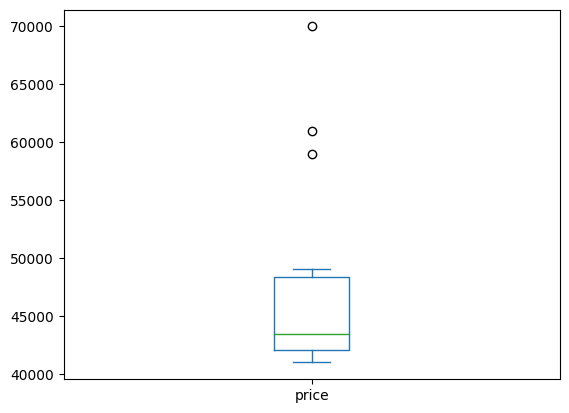

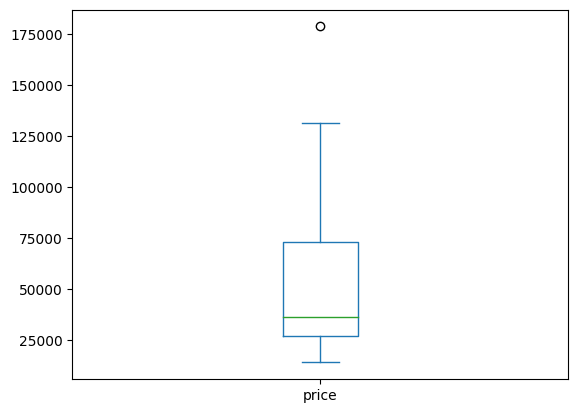

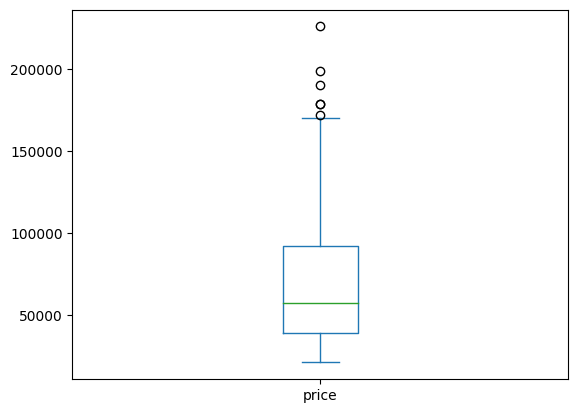

In [27]:
brand_groups.plot(kind='box', y = 'price') #groupby로 나라별로 데이터를 확인 할 수 있다. 

brand_nation
China     AxesSubplot(0.125,0.11;0.775x0.77)
Taiwan    AxesSubplot(0.125,0.11;0.775x0.77)
U.S       AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

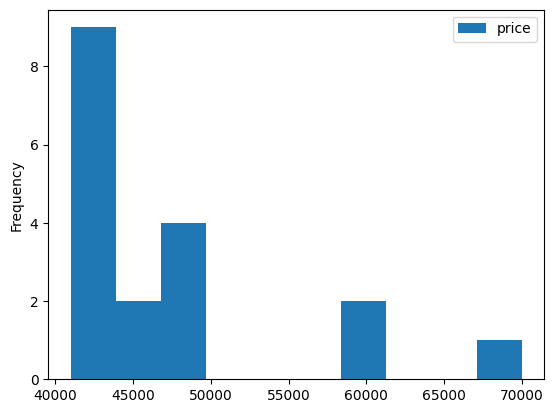

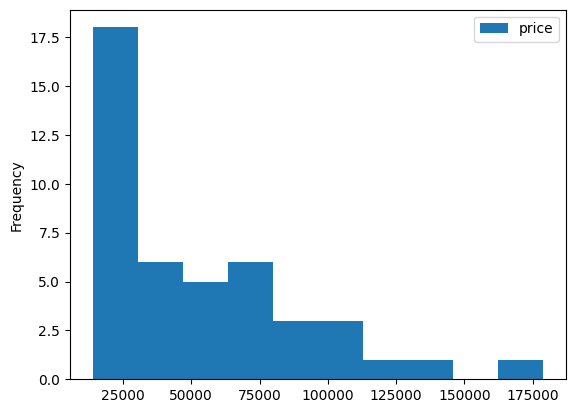

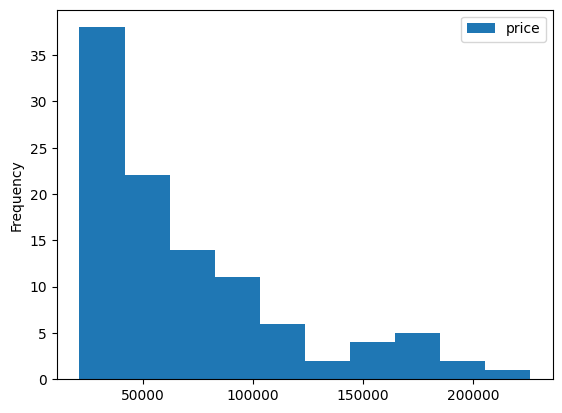

In [28]:
brand_groups.plot(kind='hist', y = 'price')

# 09. 직업 탐구하기 I

실습 설명
직업과 나이, 성별 등에 대한 데이터가 data/occupations.csv에 있습니다.

각 직업의 평균 나이가 궁금한데요.

groupby 문법을 사용해서 '평균 나이'가 어린 순으로 직업을 나열해 보세요.



In [30]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns 

df = pd.read_csv('./data/occupations.csv', index_col = 0)
df

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [32]:
occ_group = df.groupby('occupation')
occ_group.count()

,age,gender,zip_code
occupation,,,
administrator,79,79,79
artist,28,28,28
doctor,7,7,7
educator,95,95,95
engineer,67,67,67
entertainment,18,18,18
executive,32,32,32
healthcare,16,16,16
homemaker,7,7,7


In [35]:
occ_group.mean().sort_values(by = 'age')

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_51560/2426871366.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  occ_group.mean().sort_values(by = 'age')


,age
occupation,
student,22.081633
none,26.555556
entertainment,29.222222
artist,31.392857
homemaker,32.571429
programmer,33.121212
technician,33.148148
other,34.523810
scientist,35.548387


# 10. 직업 탐구하기 II

실습 설명
이번에는 여자 비율이 높은 직업과, 남자 비율이 높은 직업이 무엇인지 궁금한데요.

groupby 문법을 사용해서 '여성 비율'이 높은 순으로 직업을 나열해 보세요.

DataFrame이 아닌 Series로, 'gender'에 대한 값만 아래와 같이 출력되어야 합니다.

In [77]:
import pandas as pd 
df = pd.read_csv('./data/occupations.csv')
occ_group = df.groupby('occupation')
df #-> gender 컬럼에 값이 숫자가 아님 즉 -> 문자열 포맷팅 해줘야함

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [78]:
df.loc[df['gender'] == 'M', 'gender'] = 0
df.loc[df['gender'] == 'F', 'gender'] = 1
df


,user_id,age,gender,occupation,zip_code
0,1,24,0,technician,85711
1,2,53,1,other,94043
2,3,23,0,writer,32067
3,4,24,0,technician,43537
4,5,33,1,other,15213
...,...,...,...,...,...
938,939,26,1,student,33319
939,940,32,0,administrator,02215
940,941,20,0,student,97229
941,942,48,1,librarian,78209


In [80]:
occ_group.mean()

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_51560/1438587492.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  occ_group.mean()


,user_id,age
occupation,,
administrator,430.949367,38.746835
artist,451.892857,31.392857
doctor,533.714286,43.571429
educator,466.905263,42.010526
engineer,456.328358,36.388060
entertainment,398.000000,29.222222
executive,422.312500,38.718750
healthcare,501.437500,41.562500
homemaker,443.000000,32.571429


In [ ]:
import pandas as pd

df = pd.read_csv('data/occupations.csv')

occupation_group = df.groupby('occupation')
df.loc[df['gender'] == 'M', 'gender'] = 0
df.loc[df['gender'] == 'F', 'gender'] = 1
df = df.astype({'gender' : 'int'})
df.info()


occupation_group.mean()['gender'].sort_values(ascending=False)


# 11. 데이터 합치기 (merge)

1. inner join : A/B 데이터에 대해 겹치는 부분만 합침
2. left outer join
3. right outer join
4. full outer join

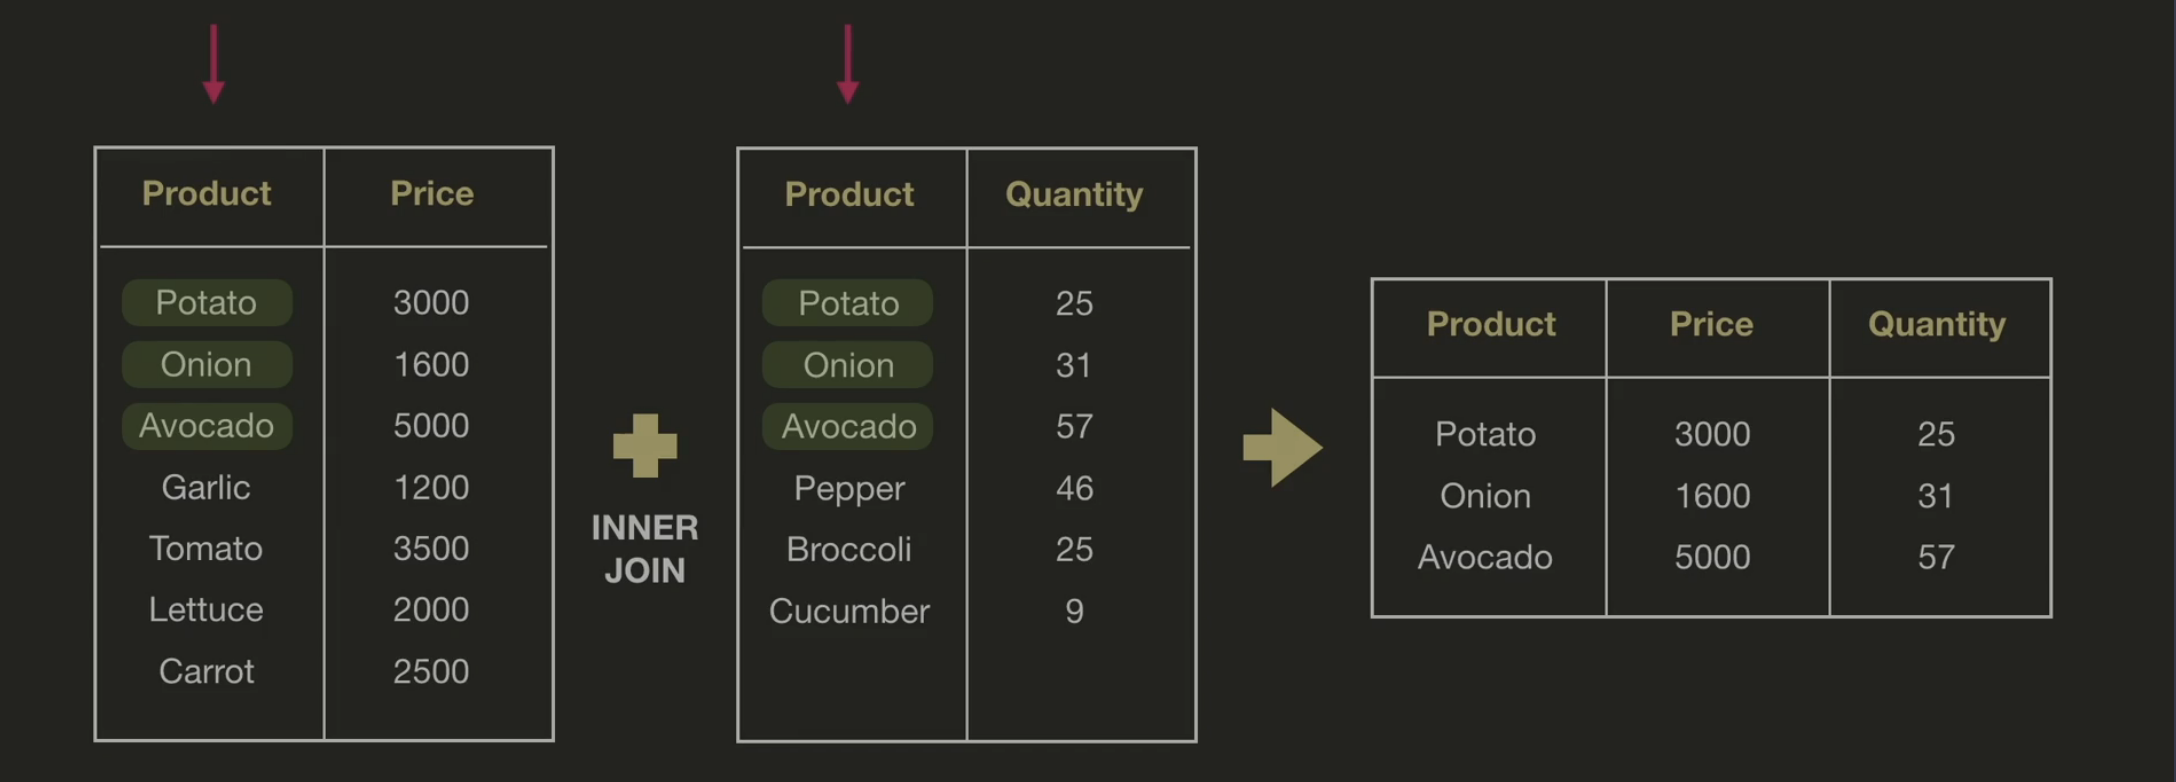

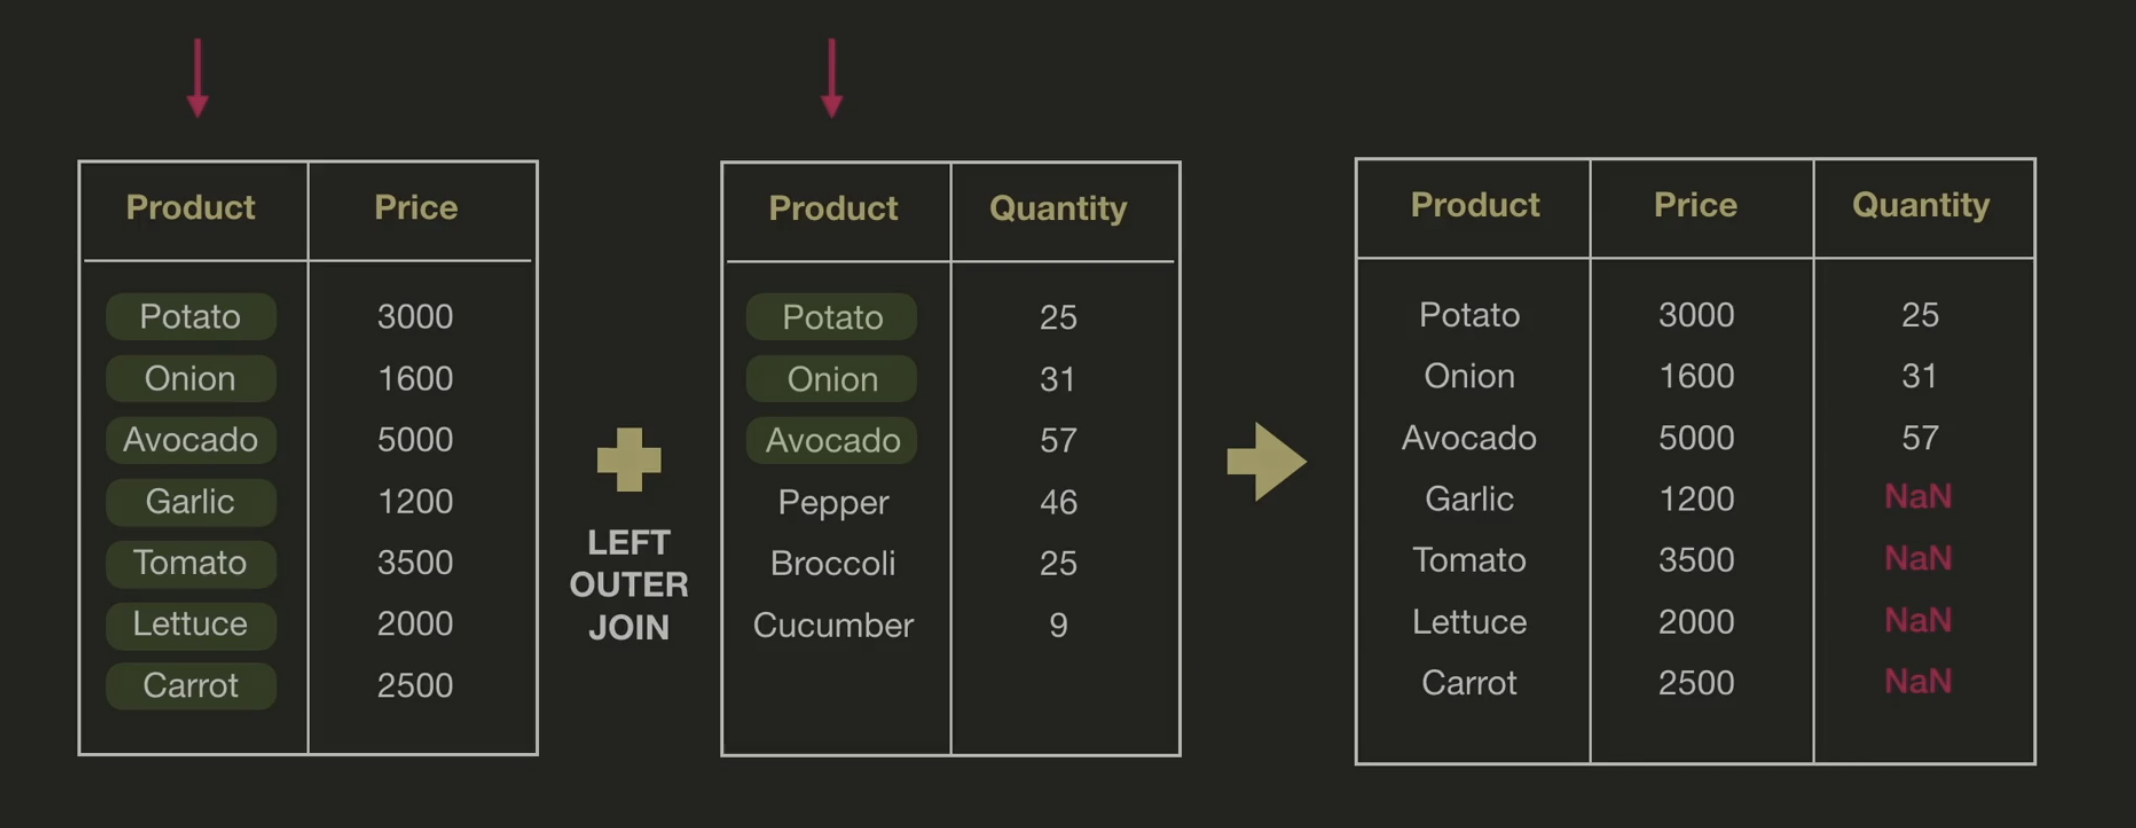

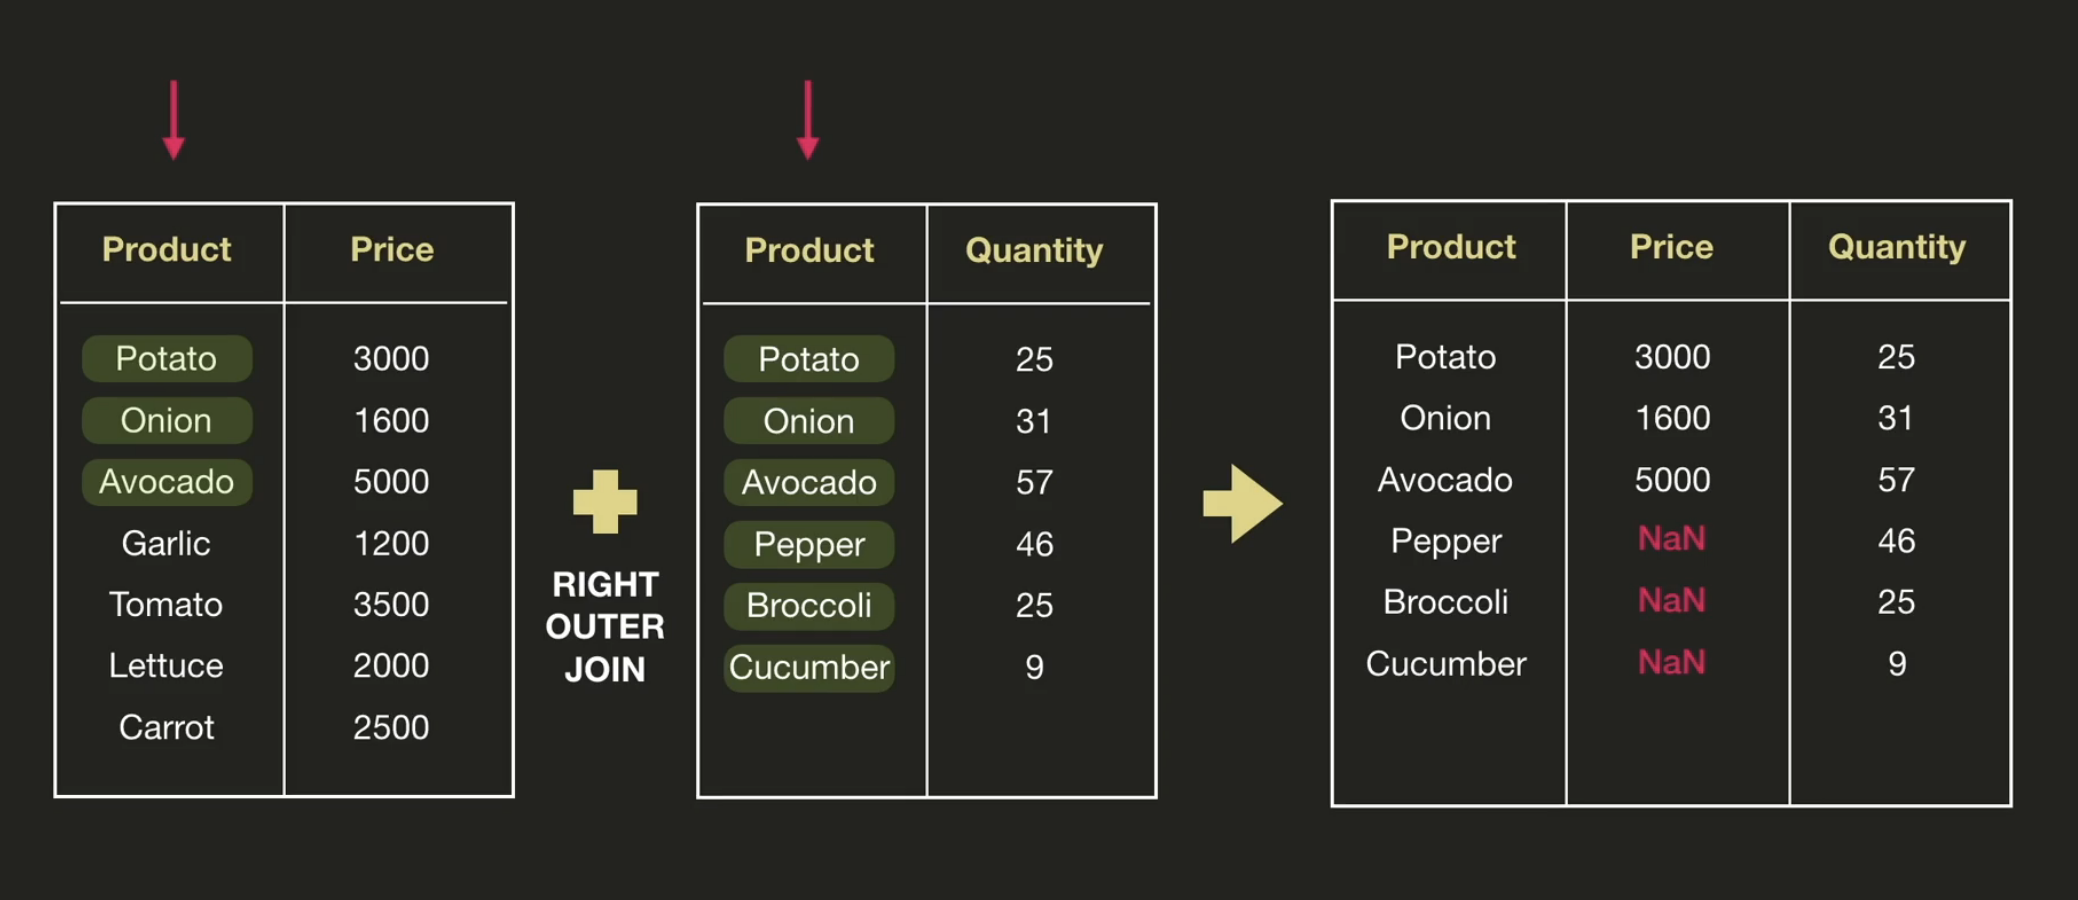

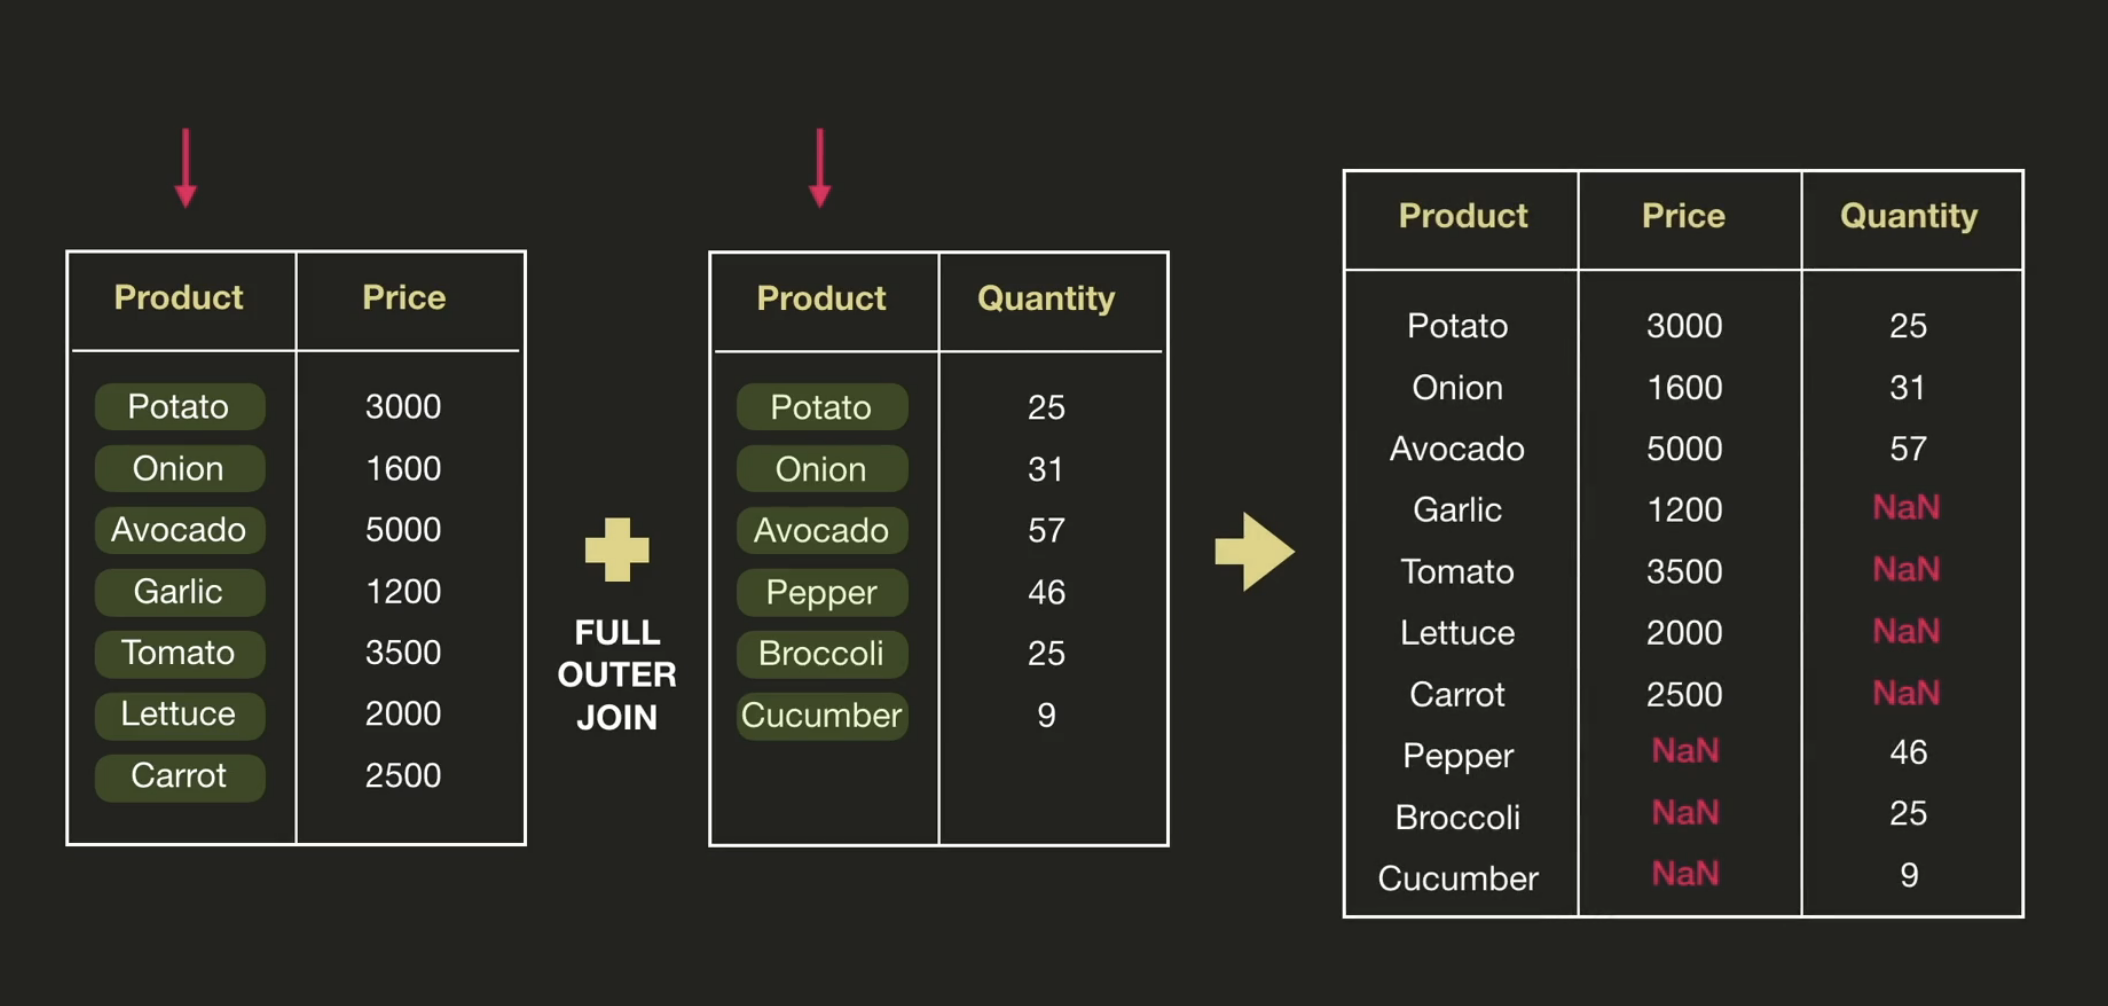

In [93]:
import pandas as pd 
price_df = pd.read_csv('./data/vegetable_price.csv')
quantity_df = pd.read_csv('./data/vegetable_quantity.csv')


In [94]:
price_df

,Product,Price
0,Potato,3000
1,Onion,1600
2,Avocado,5000
3,Garlic,1200
4,Tomato,3500
5,Lettuce,2000
6,Carrot,2500


In [95]:
quantity_df

,Product,Quantity
0,Potato,25
1,Onion,31
2,Avocado,57
3,Pepper,46
4,Broccoli,25
5,Cucumber,9


### inner join

In [103]:
pd.merge(price_df, quantity_df, on = 'Product') #겹치는 제품만 가지고옴 default값 : inner join

,Product,Price,Quantity
0,Potato,3000,25
1,Onion,1600,31
2,Avocado,5000,57


### left join

In [104]:
pd.merge(price_df, quantity_df, on = 'Product', how = 'left') 

,Product,Price,Quantity
0,Potato,3000,25.0
1,Onion,1600,31.0
2,Avocado,5000,57.0
3,Garlic,1200,NaN
4,Tomato,3500,NaN
5,Lettuce,2000,NaN
6,Carrot,2500,NaN


### right join

In [105]:
pd.merge(price_df, quantity_df, on = 'Product', how = 'right') 

,Product,Price,Quantity
0,Potato,3000.0,25
1,Onion,1600.0,31
2,Avocado,5000.0,57
3,Pepper,NaN,46
4,Broccoli,NaN,25
5,Cucumber,NaN,9


### outer join

In [106]:
pd.merge(price_df, quantity_df, on = 'Product', how = 'outer') 

,Product,Price,Quantity
0,Potato,3000.0,25.0
1,Onion,1600.0,31.0
2,Avocado,5000.0,57.0
3,Garlic,1200.0,NaN
4,Tomato,3500.0,NaN
5,Lettuce,2000.0,NaN
6,Carrot,2500.0,NaN
7,Pepper,NaN,46.0
8,Broccoli,NaN,25.0
9,Cucumber,NaN,9.0


# 12. 박물관이 살아 있다 IV

실습 설명
파이썬 사전과 .map()을 사용해서 지역명을 알아낸 솔희는, 조금 더 편한 방법을 고민하고 있습니다.

고민하던 중, '지역번호와 지역명에 대한 데이터는 누군가 이미 만들어두지 않았을까'라는 생각을 하게 되는데요.

인터넷에서 지역번호와 지역명이 있는 데이터 region_number.csv를 구했습니다!

이 데이터를 먼저 살펴보고, .merge() 메소드를 활용해서 museum_3.csv에 '지역명' column을 추가해 보세요.

단, museum_3.csv의 박물관 순서가 유지되어야 합니다.

In [119]:
import pandas as pd

museum = pd.read_csv("./data/museum_3.csv", dtype={'지역번호': str})
number = pd.read_csv("./data/region_number.csv", dtype={'지역번호': str})

# 여기에 코드를 작성하세요

In [120]:
museum

,시설명,어른관람료,운영기관전화번호,분류,지역번호
0,필암서원 유물전시관,500,061-390-7224,일반,061
1,원주역사박물관,0,033-737-4371,일반,033
2,뮤지엄산미술관,15000,033-730-9000,일반,033
3,오랜미래신화미술관,0,033-746-5256,일반,033
4,연세대학교 원주박물관,0,033-760-2731,대학,033
...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,055
896,박물관수,5000,053-744-5500,일반,053
897,대구은행금융박물관,0,053-740-2061,일반,053
898,국립대구박물관,0,053-768-6051,일반,053


In [121]:
number

,지역번호,지역명
0,02,서울특별시
1,031,경기도
2,032,인천광역시
3,033,강원도
4,041,충청남도
5,042,대전광역시
6,043,충청북도
7,044,세종특별자치시
8,051,부산광역시
9,052,울산광역시


In [130]:
merge_df = pd.merge(museum, number, on = '지역번호', how = 'left') #left는 데이터 순서를 남겨줌 
merge_df

,시설명,어른관람료,운영기관전화번호,분류,지역번호,지역명
0,필암서원 유물전시관,500,061-390-7224,일반,061,전라남도
1,원주역사박물관,0,033-737-4371,일반,033,강원도
2,뮤지엄산미술관,15000,033-730-9000,일반,033,강원도
3,오랜미래신화미술관,0,033-746-5256,일반,033,강원도
4,연세대학교 원주박물관,0,033-760-2731,대학,033,강원도
...,...,...,...,...,...,...
895,함양박물관,0,055-960-5532,일반,055,경상남도
896,박물관수,5000,053-744-5500,일반,053,대구광역시
897,대구은행금융박물관,0,053-740-2061,일반,053,대구광역시
898,국립대구박물관,0,053-768-6051,일반,053,대구광역시
